### Bài toán tìm gian lận

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('data/creditcard_sampledata_3.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 258647 to 63421
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64

In [10]:
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0


In [11]:
df['Class'].value_counts()

0    5000
1      50
Name: Class, dtype: int64

In [14]:
'''
có 50 giá trị chệnh lệch trong 5000 data
'''

'\ncó 50 giá trị chệnh lệch trong 5000 data\n'

In [15]:
df['Class'].value_counts()/len(df.index) 

0    0.990099
1    0.009901
Name: Class, dtype: float64

## Original Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
X = df.drop('Class', axis=1)
y = df['Class']

In [18]:
# tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# khởi tạo model
model_o = LogisticRegression()

In [20]:
# huấn luyện model
model_o.fit(X_train, y_train)

LogisticRegression()

In [21]:
print('Score on train:', model_o.score(X_train, y_train))
print('Score on test:', model_o.score(X_test, y_test))

Score on train: 0.998415632426723
Score on test: 0.9968329374505146


In [22]:
yhat_train = model_o.predict(X_train)
yhat_test = model_o.predict(X_test)

In [23]:
print('Accuracy on train:', accuracy_score(y_train, yhat_train))
print('Accuracy on test:', accuracy_score(y_test, yhat_test))

Accuracy on train: 0.998415632426723
Accuracy on test: 0.9968329374505146


In [25]:
'''
cả Score và Accuracy đều cao lắm nè
'''

'\ncả Score và Accuracy đều cao lắm nè\n'

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print('Confusion matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion matrix:
[[1248    2]
 [   2   11]]


In [30]:
'''
[[1248    2]
 [   2   11]]
 
phát hiện 11 giá trị gian lận, lộ sổ 2
'''

'\n[[1248    2]\n [   2   11]]\n \nphát hiện 11 giá trị gian lận, lộ sổ 2\n'

In [31]:
print('Classification report:')
print(classification_report(y_test, yhat_test))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       0.85      0.85      0.85        13

    accuracy                           1.00      1263
   macro avg       0.92      0.92      0.92      1263
weighted avg       1.00      1.00      1.00      1263



In [34]:
'''
để tăng hiệu suất này lên (hiện tại là 0.85) thì coi ở dưới:)))
'''

'\nđể tăng hiệu suất này lên (hiện tại là 0.85) thì coi ở dưới:)))\n'

## Resampling Data

In [33]:
# sử dụng Oversamling với SMOTE
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [26]:
#khởi tạo 
sm = SMOTE()

In [27]:
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [28]:
# khởi tạo model
model_rs = LogisticRegression()

In [29]:
# huấn luyện model
model_rs.fit(X_train_resample, y_train_resample)

LogisticRegression()

In [30]:
print('Score on train:', model_rs.score(X_train_resample, y_train_resample))
print('Score on test:', model_rs.score(X_test, y_test))

Score on train: 0.9993343982960596
Score on test: 0.9960411718131433


In [31]:
yhat_test = model_rs.predict(X_test)

In [32]:
print('Accuracy on test:', accuracy_score(y_test, yhat_test))

Accuracy on test: 0.9960411718131433


In [33]:
print('Confusion matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion matrix:
[[1244    0]
 [   5   14]]


In [34]:
print('Classification report:')
print(classification_report(y_test, yhat_test))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1244
           1       1.00      0.74      0.85        19

    accuracy                           1.00      1263
   macro avg       1.00      0.87      0.92      1263
weighted avg       1.00      1.00      1.00      1263



In [36]:
# SMOTE(sampling_strategy={0: 3756, 1: 2000})
len(y_train[y_train == 0]), len(y_train[y_train == 1])

(3756, 31)

### ROC curve

In [41]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [38]:
yhat_test_proba = model_rs.predict_proba(X_test)

In [39]:
yhat_test_proba[:3]

array([[9.99997061e-01, 2.93945184e-06],
       [9.99953195e-01, 4.68048773e-05],
       [9.99932900e-01, 6.71003724e-05]])

In [40]:
yhat_positive = yhat_test_proba[:, 1]

In [42]:
print(roc_auc_score(y_test, yhat_positive))

0.9613301743103739


In [43]:
#TPR và FPR
fpr, tpr, thresholds = roc_curve(y_test, yhat_positive)

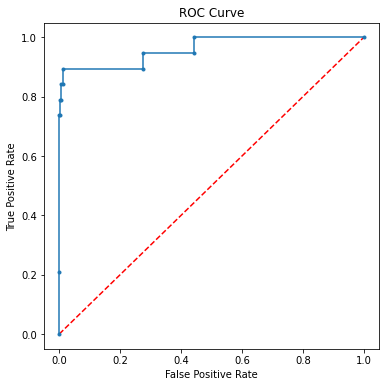

In [46]:
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()